<a href="https://colab.research.google.com/github/EliTirman/Pra3024_2023/blob/main/Week5MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I started getting an error with importing from keras on Sunday, so i could not continue training and testing a model anymore :(

In [9]:
### IMPORTS ###
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras import Sequential, datasets
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
#import tensorflow as tf
#from tensorflow import keras
from keras import backend as K
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
# Loading the data from cifar10 and defining our variables:
# here x variables correspond to input features, and y variables - to output labels from training, testing, or validation datasets.
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

# reshape the y_train to remove the second array in it, since we dont need it
y_train = y_train.reshape(-1, )

# define our class label names in order that they are in the dataset
y_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

In [3]:
# define useful variables 
batch_size = 64
epochs = 5
learning_rate = 0.0001
num_classes = 10
image_vector_size = (32, 32, 3)
# Normalize dataset
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

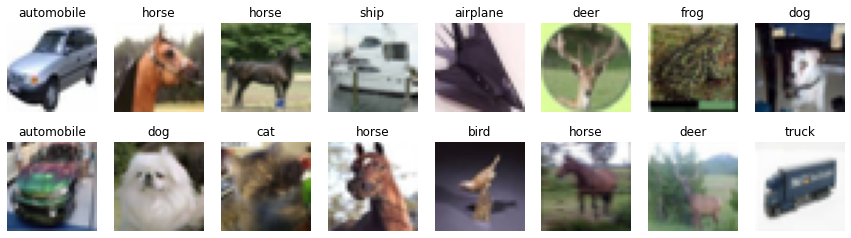

In [4]:
# print random images from the dataset along with their proper labels
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(y_classes[y_train[random_index]])
plt.show()

In [5]:
# convert data to encoded vectors 
y_train = keras.utils.to_categorical(y_train, num_classes=10)

y_val = keras.utils.to_categorical(y_val, num_classes=10)

y_test = keras.utils.to_categorical(y_test, num_classes=10)

print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [6]:
def make_model():

    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add.Conv2D(128, (3, 3), activation="relu", padding="same")
    model.add(MaxPooling2D((2, 2)))

    model.add(Dropout(0.2))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    return model

In [10]:
K.clear_session()  # clear default graph
model = make_model() # define the model
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=learning_rate), metrics=['accuracy']) # compile the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(
    x_train, y_train,  # prepared data
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
) # test the network

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
# save weights to file to avoid re-training
model.save_weights("weights.h5")

# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

AttributeError: ignored

In [ ]:
model.summary()

In [ ]:
# plot the model as a graph
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# make test predictions
y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
y_test_index = [list(onehot).index(1) for onehot in y_test]

# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_classes))
plt.xticks(np.arange(10), y_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), y_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test_index, y_pred_test_classes))

In [ ]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = y_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = y_classes[y_test_index[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()